<a href="https://colab.research.google.com/github/doanxuantambk/tensorflow_for_ai/blob/master/Week3_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

print(train_imgs.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
print(test_imgs.shape)

(10000, 28, 28)


9
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


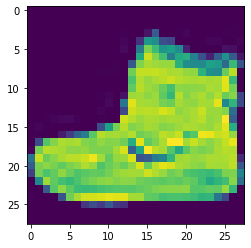

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_imgs[0])
# print(train_imgs[0])
print(train_labels[0])
all_labels = set(train_labels)
print(all_labels)

In [ ]:
train_imgs = train_imgs.reshape(60000,28,28,1)
test_imgs = test_imgs.reshape(10000, 28,28,1)
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

In [ ]:
import tensorflow as tf
model =tf.keras.models.Sequential([
                                  tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
                                  tf.keras.layers.MaxPooling2D(2,2),
                                  tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
#model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
#                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = "sparse_categorical_crossentropy")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [ ]:
model.fit(train_imgs, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4396
Epoch 2/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2950
Epoch 3/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2498
Epoch 4/5
1875/1875 [==============================] - 82s 43ms/step - loss: 0.2155
Epoch 5/5
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1921


In [ ]:
model.evaluate(test_imgs, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.2551


0.2551127076148987

In [ ]:
classification = model.predict(test_imgs)

In [ ]:
print(classification[0])

[6.77171045e-07 2.99342986e-07 3.42359918e-09 1.16252714e-07
 1.48624482e-08 2.86294118e-04 2.45496580e-07 3.41916195e-04
 3.03114831e-07 9.99370039e-01]


In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


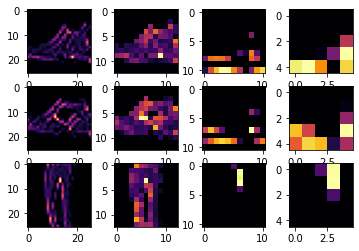

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=2
CONVOLUTION_NUMBER=1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_imgs[FIRST_IMAGE].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_imgs[SECOND_IMAGE].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_imgs[THIRD_IMAGE].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
